In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
18212,56.96284103393555,24.139026641845703,2024-11-11 15:55:35
18213,57.13914108276367,24.835847854614258,2024-11-11 15:58:38
18214,56.95495495495496,24.121027283586987,2024-11-11 15:58:51
18215,56.973,24.1327,2024-11-11 16:00:32


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
18212,56.96284103393555,24.139026641845703,2024-11-11 15:55:35,2024-11-11 15
18213,57.13914108276367,24.835847854614258,2024-11-11 15:58:38,2024-11-11 15
18214,56.95495495495496,24.121027283586987,2024-11-11 15:58:51,2024-11-11 15
18215,56.973,24.1327,2024-11-11 16:00:32,2024-11-11 16


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

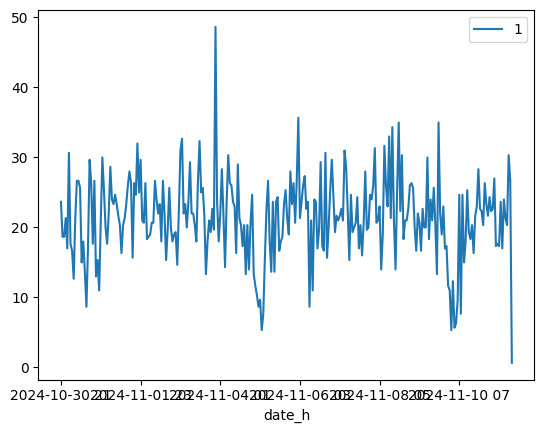

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


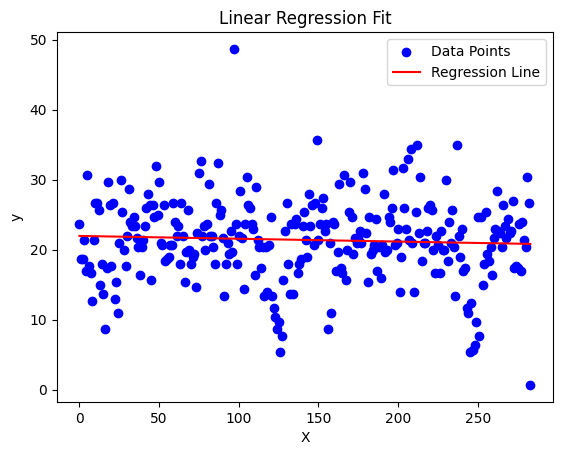

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[21.94998765],
       [21.94596975],
       [21.94195185],
       [21.93793396],
       [21.93391606],
       [21.92989817],
       [21.92588027],
       [21.92186238],
       [21.91784448],
       [21.91382658],
       [21.90980869],
       [21.90579079],
       [21.9017729 ],
       [21.897755  ],
       [21.8937371 ],
       [21.88971921],
       [21.88570131],
       [21.88168342],
       [21.87766552],
       [21.87364763],
       [21.86962973],
       [21.86561183],
       [21.86159394],
       [21.85757604],
       [21.85355815],
       [21.84954025],
       [21.84552236],
       [21.84150446],
       [21.83748656],
       [21.83346867],
       [21.82945077],
       [21.82543288],
       [21.82141498],
       [21.81739709],
       [21.81337919],
       [21.80936129],
       [21.8053434 ],
       [21.8013255 ],
       [21.79730761],
       [21.79328971],
       [21.78927182],
       [21.78525392],
       [21.78123602],
       [21.77721813],
       [21.77320023],
       [21